### Домашнее задание

   - взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
   - сделать обзорный анализ выбранного датасета
   - сделать feature engineering
   - обучить любой классификатор (какой вам нравится)
   - разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%
   - для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

Clump Thickness - Толщина сгустка

Uniformity of Cell Size - Однородность размера клеток

Uniformity of Cell Shape - Однородность формы клеток

Marginal Adhesion - Краевая адгезия

Single Epithelial Cell Size - Размер одной эпителиальной клетки

Bare Nuclei - Голые Ядра

Bland Chromatin - Мягкий Хроматин

Normal Nucleoli - Нормальные Ядрышки

Mitoses - Митоз

Class - Класс (2 for benign, 4 for malignant)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns
import xgboost

import shap
shap.initjs()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = Path('C:/Users/Данила/Documents/Data science/ML в бизнесе/train_data/Breast Cancer Wisconsin')

df = pd.read_csv(DATA_PATH / 'breast-cancer-wisconsin.data',
                   names=[
                       "ID",
                       "Clump_Thickness",
                       "Uniformity_of_Cell_Size",
                       "Uniformity_of_Cell_Shape",
                       "Marginal_Adhesion",
                       "Single_Epithelial_Cell_Size",
                       "Bare_Nuclei",
                       "Bland_Chromatin",
                       "Normal_Nucleoli",
                       "Mitoses",
                       "Class"])
df = df.set_index('ID')
df.head(3)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [4]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [5]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace({'?': np.NAN})
df['Bare_Nuclei'].fillna(0,inplace = True)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('int64')

In [6]:
df.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
X = df.drop(['Class'], axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

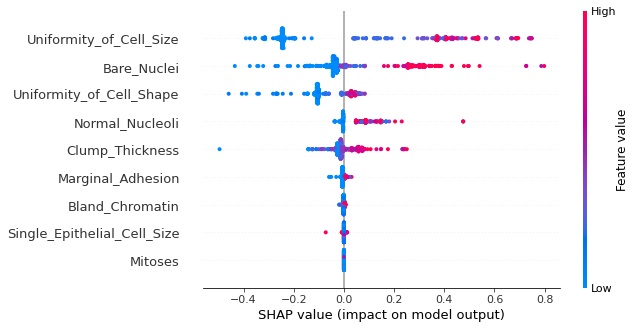

In [8]:
model = xgboost.train({"learning_rate": 0.01}, 
                      xgboost.DMatrix(X_train, label=y_train), 100)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

#### Интерпретация:
Чем выше неоднородность размера клетки, тем выше вероятность рака.

Чем выше более обнажены ядра,  тем выше вероятность рака.

Чем выше однородность формы и размера клеток, тем ниже вероятность рака.

Чем больше нормальных ядрышек, тем выше вероятность рака.

Чем толще сгусток, тем выше вероятность рака.

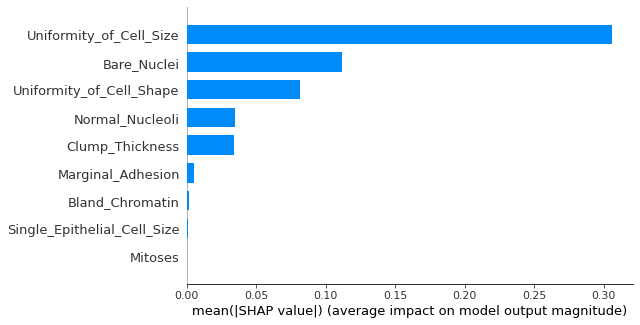

In [9]:
shap.summary_plot(shap_values, X_train, plot_type="bar")